# Project 8 : Credit Card Fraud Detection

### 1. Let's begin by importing some basic data anaytic and visualization libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cred_card = pd.read_csv("creditcard.csv.crdownload")

In [21]:
cred_card.shape

(11664, 31)

In [4]:
cred_card.head(10)

Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5     2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6     4  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7     7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8     7 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9     9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
7 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
8  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   
9  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050 -0.069733   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62    0.0  
1  0.125895 -0.008983  0.014724    2.69    0.0  
2 -0.139097 -0.055353 -0.059752  378.66    0.0  
3 -0.221929  0.062723  0.061458  123.50    0.0  
4  0.502292  0.219422  0.215153   69.99    0.0  
5  0.105915  0.253844  0.081080    3.67    0.0  
6 -0.257237  0.034507  0.005168    4.99    0.0  
7 -0.051634 -1.206921 -1.085339   40.80    0.0  
8 -0.384157  0.011747  0.142404   93.20    0.0  
9  0.094199  0.246219  0.083076    3.68    0.0  

[10 rows x 31 columns]

### Target variable:

'Class': This is a binary variable where 0 represents "Not fraud" and 1 represents "Fraud".

### Feature variables:

'Time': The seconds elapsed between each transaction and the first transaction in the dataset.
'Amount': The transaction amount.
'V1', 'V2', ..., 'V28': The principal components resulting from the PCA transformation. Due to confidentiality reasons, the original features and additional background information about the data cannot be provided

In [5]:
cred_card['Class'].value_counts()

0.0    11615
1.0       49
Name: Class, dtype: int64

In [6]:
cred_card['Amount'].value_counts()

1.00      655
15.95     351
5.00      282
11.85     221
0.89      159
         ... 
85.46       1
169.32      1
37.62       1
36.37       1
663.10      1
Name: Amount, Length: 4138, dtype: int64

In [13]:
cred_card['Time'].value_counts()

3767     21
3770     20
19912    19
3750     19
3760     17
         ..
1540      1
7591      1
7590      1
1544      1
7474      1
Name: Time, Length: 7682, dtype: int64

### 2. Feature Engineering

In [12]:
cred_card = cred_card.dropna()
cred_card.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62    0.0  
1  0.125895 -0.008983  0.014724    2.69    0.0  
2 -0.139097 -0.055353 -0.059752  378.66    0.0  
3 -0.221929  0.062723  0.061458  123.50    0.0  
4  0.502292  0.219422  0.215153   69.99    0.0  

[5 rows x 31 columns]

In [10]:
cred_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
import sidetable as stb
cred_card.stb.freq(['Time'], style = True)

In [22]:
#What might be much more interesting is looking at the total breakdown by Time, Class column.
#.sidetable allows you to pass a value column that can be summed (instead of counting occurrences).
cred_card.stb.freq(['Time','Class'], value = 'Amount')

Time  Class   Amount   percent  cumulative_Amount  cumulative_percent
0      1264    0.0  7798.22  1.064687            7798.22            1.064687
1     10538    0.0  4010.62  0.547568           11808.84            1.612255
2      8544    0.0  4002.88  0.546511           15811.72            2.158766
3       103    0.0  3865.49  0.527753           19677.21            2.686520
4      1698    0.0  3669.00  0.500927           23346.21            3.187446
...     ...    ...      ...       ...                ...                 ...
7622   4518    0.0     0.01  0.000001          732442.38           99.999995
7623   3665    0.0     0.01  0.000001          732442.39           99.999996
7624   3389    0.0     0.01  0.000001          732442.40           99.999997
7625   2568    0.0     0.01  0.000001          732442.41           99.999999
7626    402    0.0     0.01  0.000001          732442.42          100.000000

[7627 rows x 6 columns]

### 3. Fraudulent and Genuine Transactions....

In [24]:
# Count the occurrences of each transaction class
transaction_counts = cred_card['Class'].value_counts()

genuine_count = transaction_counts[0]
fraud_count = transaction_counts[1]

total_count = genuine_count + fraud_count
fraud_percentage = (fraud_count / total_count) * 100

In [25]:
print("Number of Genuine Transactions:", genuine_count)
print("Number of Fraud Transactions:", fraud_count)
print("Percentage of Fraud Transactions:", fraud_percentage)

Number of Genuine Transactions: 11615
Number of Fraud Transactions: 49
Percentage of Fraud Transactions: 0.4200960219478738


### 4. Data Visaulization

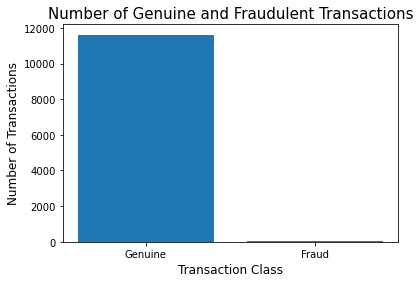

In [28]:
plt.bar(['Genuine', 'Fraud'], [genuine_count, fraud_count])
plt.xlabel('Transaction Class', fontsize = 12)
plt.ylabel('Number of Transactions',fontsize = 12)
plt.title('Number of Genuine and Fraudulent Transactions',fontsize = 15)
plt.show()

<AxesSubplot:xlabel='Time', ylabel='Amount'>

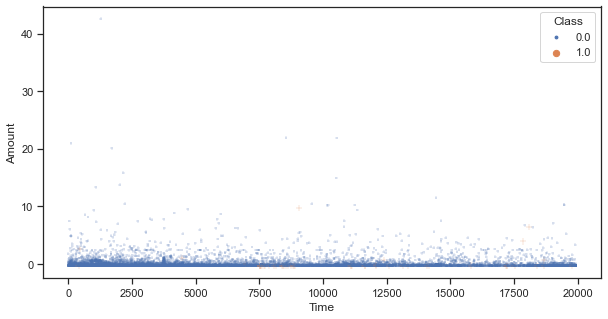

In [57]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=cred_card["Time"], y=cred_card["Amount"], hue=cred_card["Class"], 
                size=cred_card["Class"], sizes=(40, 8), marker="+")

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


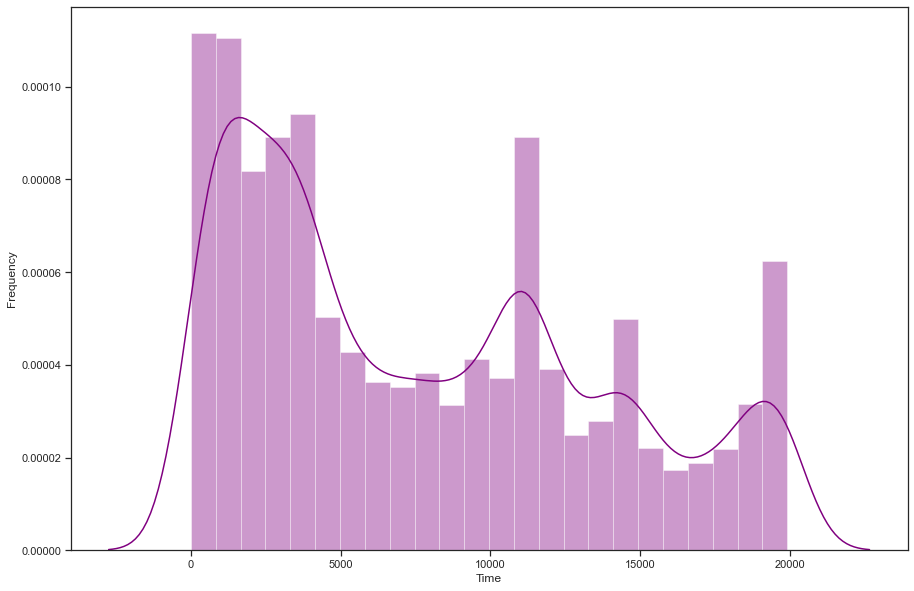

In [60]:
plt.figure(figsize=(15,10))
plot = sns.distplot(a=cred_card["Time"], kde=True, color='purple')
plot.set(xlabel ='Time', ylabel ='Frequency')
plt.show()

### 5. Data Preprocessing

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
columns_to_scale = ['Amount']

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(cred_card[columns_to_scale])

StandardScaler()

In [33]:
scaled_data = scaler.transform(cred_card[columns_to_scale])
cred_card[columns_to_scale] = scaled_data

### 6. Model builiding and Predictions

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [37]:
X, y = cred_card.iloc[:, :-1], cred_card.iloc[:, -1]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state= 42)

In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)

In [50]:
dt_score = dt.score(X_test, y_test)
print(f'Decision Tree score is {dt_score}.')

Decision Tree score is 0.9982857142857143.


In [51]:
rf_score = rf.score(X_test, y_test)
print(f'Random Forest score is {rf_score}.')

Random Forest score is 0.9991428571428571.


### 7. Model Evaluation

In [47]:
report_dt = classification_report(y_test, y_pred1)
report_rf = classification_report(y_test, y_pred2)
print("1.)The performance matrix of Decision Tree is:")
print(report_dt)
print("\n2.)The performance matrix of Random Forest is:")
print(report_rf)

1.)The performance matrix of Decision Tree is:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.78      0.88      0.82        16

    accuracy                           1.00      3500
   macro avg       0.89      0.94      0.91      3500
weighted avg       1.00      1.00      1.00      3500


2.)The performance matrix of Random Forest is:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.93      0.88      0.90        16

    accuracy                           1.00      3500
   macro avg       0.97      0.94      0.95      3500
weighted avg       1.00      1.00      1.00      3500



### After carefully evaluation of classification report of two models, we can clearly see that Random Forest has high precision, recall, f1-score than Decision Tree.